# Problem Statement

-  The Challenge is for you to develop a machine learning model to predict suspected elder fraud in the digital payments space as described in Rule 4 of the attached Campus Analytics 2021 Challenge Rules document. Your machine learning model (“Solution”) must meet: (a) the Challenge Criteria, (b) follow the Challenge Instructions and Requirements, and (c) incorporate the Key Deliverables, each described in detail below.
- 
Deliverables
Download the attached trainset dataset
Download the attached testset dataset
Download and read the attached Campus Analytics 2021 Challenge Rules document. This contains critical information about challenge deliverables, instructions, suggestions, judging criteria, and winner eligibility.
To Complete a Submission:

# Build a classification model for predicting elder fraud in the digital payments space as described in Rule 4, which:

- Handles missing variables
- Maximizes the F1 score
- Uses the given data set
- Includes suitable encoding schemes
- Has the least set of feature variables
________________________________________________________________________________________________________________________________________

The dataset provided on the Challenge page is synthetic. Conditional GAN (“CTGAN”) was used to generate the synthetic dataset for this Challenge. CTGAN is a neural network model that helps to detect the distributions for the dataset and tries to generate data records with similar distribution compared with the original datasets. It can deal with both continuous and categorical features.

________________________________________________________________________________________________________________________________________

Challenge Instructions and Requirements:

When creating your Solution, you may use a novel combination of existing machine learning and/or statistical methods, or develop your own novel method in order to extract and/or represent thematic information from the data file.

The output needs to include prediction of a target variable. Additionally, your Solution must meet the following requirements:

You must use Python 3.
You must provide citations and sources.

________________________________________________________________________________________________________________________________________


Challenge Suggestions: You may use any clustering, dimensionality reduction, or other algorithm families. Please note that among other criteria, you will be evaluated on whether your selections of methods are appropriate for structured data.

________________________________________________________________________________________________________________________________________

Key Deliverables to Submit:

Deliverable 1: Your results

A table of your results assigning topics to a list of dataset description identifiers in the format shown below.

Very important note: Each solution received should ensure that the dataset_id is present in every record and arranged numerically in the same order as the testset_for_participants.csv file. The solution should also contain a column called ‘FRAUD_NONFRAUD’, which is the predicted class (either FRAUD or NONFRAUD); value of this column needs to be 0 (FRAUD) and 1 (NonFraud). If this is not the case, the submission will be automatically disqualified.






Deliverable 2: Your method

A description of your approach delivered as:

A visual description (flow chart or similar) of the path of the data through your pipeline. Note the areas where your approach is novel.
A few paragraphs describing the rationale behind your method.
Deliverable 3: Your code

Well-commented code that is operational and can be run using the data provided and generating the output of your approach.
An environment configuration file that lists the names and versions of the libraries you used.
NOTE** - You will use the attached "trainset" dataset to build your model. After you have the model, you will run it on the attached "testset_for_participants," produce the scores, and submit them.



# Variable Description:
- TRAN_AMT                           : Transaction Amount 
- ACCT_PRE_TRAN_AVAIL_BAL            : Account Pre Transaction availble before fraud.
- CUST_AGE                           : Customer Age
- OPEN_ACCT_CT                       : Count of open accounts
- WF_dvc_age                         : Wells fargo acocount age (days)
- PWD_UPDT_TS                        : Date and time of password updated
- CARR_NAME                          : Carieer/broadband Company Name 
- RGN_NAME                           : Region
- STATE_PRVNC_TXT                    : State Province Area
- ALERT_TRGR_CD                      : Alert triggered Platform (mobile or Comp)
- DVC_TYPE_TXT                       : Device Type
- AUTHC_PRIM_TYPE_CD                 : Primary Authentication Type (Password, face ID )
- AUTHC_SCNDRY_STAT_TXT              : Secondary Authentication Status text (Allow, Challeneg Success, Challenege                                            Issued, nan)
- CUST_ZIP                           : Customer Zip Code
- CUST_STATE                         : Customer State 
- PH_NUM_UPDT_TS                     : Phone Number Updated Date,time, Seconds 
- CUST_SINCE_DT                      : Customer Since Date 
- TRAN_TS                            : Transaction Date, time , seconds
- TRAN_DT                            : transaction date
- ACTN_CD                            : to be removed
- ACTN_INTNL_TXT                     : To be removed
- TRAN_TYPE_CD                       : to be removed
- ACTVY_DT                           : Activity Date
- FRAUD_NONFRAUD                     : Fraud/Non-Fraud

### STEPS TO DO DATA CLEANING and PREPERATION:
- EXPLORATORY DATA ANALYSIS:
    - First, deal with the missing values of the data.
    - Divide the variables into ananymized and non anonymized, and focus on the non-anonymized during EDA.
    - Identify the important variables and plot the distrubution of those variables and observe the skewness.
    - plot the visualization to understand the dataset.(Ex: bar chart for count and heat map for finding correlations.
    - Check the count of the frad/no-fraud variable.
- DATA PREPERATION:
    - Scale every numeric variable considering for analysis, so that algorithm dont perform worse.
    - deal with the missing values.
- TURNING HT EIMBALANCED DATASET INTO BALANCED:
    - Utilize random under-sampling to create a blanced dataset.
    - Make use of the test stats(ROC-AUC score, accuracy) to evaluate the perfomance.
- Dimensionality Reduction:
    - perform t-sne test to perform dimensionality reduction.
    - t-sne: t-distributed stochastic neigbour embedding.
        - read here: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [116]:
train=pd.read_excel("Train Dataset.xlsx") #loading the dataset

In [69]:
train['ACTVY_DT'].unique()

array(['5/3/2021', '1/13/2021', '4/8/2021', '8/10/2021', '6/27/2021',
       '5/18/2021', '1/8/2021', '6/14/2021', '7/4/2021', '3/3/2021',
       '2/16/2021', '3/5/2021', '4/20/2021', '4/17/2021', '1/31/2021',
       '3/2/2021', '1/11/2021', '1/12/2021', '6/17/2021', '2/11/2021',
       '1/4/2021', '7/16/2021', '5/13/2021', '6/9/2021', '4/22/2021',
       '3/18/2021', '5/4/2021', '5/12/2021', '2/1/2021', '7/10/2021',
       '7/21/2021', '2/17/2021', '8/4/2021', '4/2/2021', '6/21/2021',
       '3/1/2021', '2/8/2021', '4/11/2021', '5/8/2021', '3/25/2021',
       '7/22/2021', '1/19/2021', '2/18/2021', '5/6/2021', '3/23/2021',
       '3/19/2021', '1/9/2021', '7/28/2021', '2/3/2021', '7/13/2021',
       '8/20/2021', '7/7/2021', '4/1/2021', '7/5/2021', '2/15/2021',
       '6/24/2021', '2/9/2021', '3/13/2021', '1/6/2021', '7/29/2021',
       '1/29/2021', '7/11/2021', '1/22/2021', '3/26/2021', '2/21/2021',
       '7/19/2021', '3/16/2021', '6/5/2021', '6/22/2021', '4/19/2021',
       '3/9/2021'

In [70]:
train['TRAN_DT'].size

14000

In [71]:
train['TRAN_TS'].unique().size

13500

In [72]:
train['TRAN_TS'].size

14000

In [73]:
train.isnull()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13996,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
13997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13998,False,False,False,False,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False


In [74]:
train.head(10)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud
5,488.55,2851.44,45,8,1,3/15/2021 15:36:36,"ultimate internet access, inc",southwest,california,ONLN,...,CO,5/18/2021 9:50:5,2011-06-13,5/18/2021 14:36:36,5/18/2021,SCHPMT,P2P_COMMIT,P2P,5/18/2021,Fraud
6,490.60,3018.98,55,7,531,4/30/2021 19:16:2,cox communications inc.,southwest,california,MOBL,...,CA,3/16/2018 16:50:5,1971-10-02,1/8/2021 12:16:2,1/8/2021,SCHPMT,P2P_COMMIT,P2P,1/8/2021,Fraud
7,468.40,0.00,56,6,47,5/22/2021 18:34:33,t-mobile usa inc.,southwest,california,ONLN,...,CA,7/28/2019 12:4:47,1991-10-30,6/14/2021 12:34:33,6/14/2021,SCHPMT,P2P_COMMIT,P2P,6/14/2021,Non-Fraud
8,0.01,0.00,36,6,1182,1/27/2021 16:7:20,cox communications inc.,southwest,california,ONLN,...,TX,12/6/2019 6:4:6,2020-07-08,7/4/2021 12:0:51,7/4/2021,SCHPMT,P2P_COMMIT,P2P,7/4/2021,Non-Fraud
9,14.23,1890.65,72,4,276,4/22/2020 9:56:55,NaN,NaN,NaN,ONLN,...,VA,5/12/2017 10:54:10,1976-12-23,3/3/2021 7:14:46,3/3/2021,SCHPMT,P2P_COMMIT,P2P,3/3/2021,Fraud


In [75]:
train['PH_NUM_UPDT_TS']

0        2/24/2021 15:55:10
1                       NaN
2           5/5/2019 1:8:39
3         2/16/2019 6:45:37
4          5/8/2020 10:27:6
                ...        
13995     7/15/2017 6:58:59
13996                   NaN
13997      5/25/2021 8:50:5
13998                   NaN
13999                   NaN
Name: PH_NUM_UPDT_TS, Length: 14000, dtype: object

# Exploratory Data Analysis:

### Handling Missing Values:

<AxesSubplot:>

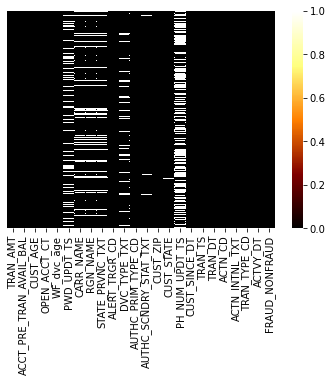

In [76]:
sns.heatmap(train.isnull(),yticklabels=False, cmap="afmhot")
#create a heatmap using seaborn by loding the missing values dataset.
# used to find the missing values

In [77]:
#WE HAVE TO FIND THE MISSING VALUES AND REMOVE THOSE ROWS AND COLUMNS.
#Find highly correlated numeric columns.
#perform EDA on the data.

features_NaN = [ features for features in train.columns if train[features].isnull().sum()>=1 ]

features_NaN


['PWD_UPDT_TS',
 'CARR_NAME',
 'RGN_NAME',
 'STATE_PRVNC_TXT',
 'DVC_TYPE_TXT',
 'AUTHC_SCNDRY_STAT_TXT',
 'CUST_STATE',
 'PH_NUM_UPDT_TS']

In [78]:
for features in features_NaN:
    print(features,'-',np.round(train[features].isnull().mean(),4),'% missing values')

PWD_UPDT_TS - 0.2232 % missing values
CARR_NAME - 0.1935 % missing values
RGN_NAME - 0.1935 % missing values
STATE_PRVNC_TXT - 0.1935 % missing values
DVC_TYPE_TXT - 0.1258 % missing values
AUTHC_SCNDRY_STAT_TXT - 0.0053 % missing values
CUST_STATE - 0.0026 % missing values
PH_NUM_UPDT_TS - 0.5044 % missing values


In [52]:
# Finding the realtionship btw missing values and dependent variable
#only numeric data can be used

In [64]:
#for features in features_NaN:
    #data=train.copy()
    #data[features]=np.where(data[features].isnull(),1,0)
    #data.groupby(features) ['FRAUD_NONFRAUD'].plot.bar()
    #plt.title(features)
    #plt.ylabel('FRAUD AND NONFRAUD').median().plot.bar()
    #plt.show()

In [79]:
#Chi-Square test to know the strength between NaN values and target variable
from scipy.stats import chi2_contingency
    #chisquareresult= chi2_contingency(crosstabs)
    #print(chisquareresult)
for features in features_NaN:
    data=train.copy()
    data[features]=np.where(data[features].isnull(),1,0)
    crosstabresult= pd.crosstab( index= data[features], columns= train['FRAUD_NONFRAUD']  )
    print(crosstabresult)
    chisquareresult= chi2_contingency(crosstabresult)
    print("The chi squre test of this cross tab is:", chisquareresult[1])
#we have to calculate the chi square test for the cross tab result 
#and if the p value of that test is >0.05, we consider the null hypothesis is true(which is the columns are not correlated)

FRAUD_NONFRAUD  Fraud  Non-Fraud
PWD_UPDT_TS                     
0                3628       7247
1                 536       2589
The chi squre test of this cross tab is: 3.576992520379716e-68
FRAUD_NONFRAUD  Fraud  Non-Fraud
CARR_NAME                       
0                2195       9096
1                1969        740
The chi squre test of this cross tab is: 0.0
FRAUD_NONFRAUD  Fraud  Non-Fraud
RGN_NAME                        
0                2195       9096
1                1969        740
The chi squre test of this cross tab is: 0.0
FRAUD_NONFRAUD   Fraud  Non-Fraud
STATE_PRVNC_TXT                  
0                 2195       9096
1                 1969        740
The chi squre test of this cross tab is: 0.0
FRAUD_NONFRAUD  Fraud  Non-Fraud
DVC_TYPE_TXT                    
0                3215       9024
1                 949        812
The chi squre test of this cross tab is: 5.763962270780541e-124
FRAUD_NONFRAUD         Fraud  Non-Fraud
AUTHC_SCNDRY_STAT_TXT             

In [80]:
print(crosstabresult)

FRAUD_NONFRAUD  Fraud  Non-Fraud
PH_NUM_UPDT_TS                  
0                2816       4123
1                1348       5713


In [81]:
from scipy.stats import chi2_contingency
for crosstabs in crosstabresult:
    print(crosstabs)
    #chisquareresult= chi2_contingency(crosstabs)
    #print(chisquareresult)

Fraud
Non-Fraud


In [82]:
crosstabresult.size

4

Correalted columns in order:
- RGN_NAME (HIGHLY CORREALTED)
- STATE_PRVNC_TEST
- CARR_NAME 
- PH_NUM_UPDT_TS 
- DVC_TYPE_TXT
- PWD_UPDT_TS
- AUTHC_SCNDRY_STAT_TXT
- CUST_STATE

In [ ]:
train[['RGN_NAME','STATE_PRVNC_TXT','CARR_NAME']].head(10)

Report(9/29/2021):
- Career name , region name and state province are highly corrrelated with the target variable among the columns with null values. 
- This implies that, those three columns should never be removed and to be dealt with missing values.

### Performing Hierarchial Clustering:

In [83]:
train['PWD_UPDT_TS'] = train['PWD_UPDT_TS'].str.split().str[0]

train['TRAN_TS'] = train['TRAN_TS'].str.split().str[0]

train['PH_NUM_UPDT_TS'] = train['TRAN_TS'].str.split().str[0]

#time stamp removed

In [86]:
train.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018,cox communications inc.,southwest,nevada,MOBL,...,NV,5/3/2021,1993-01-06,5/3/2021,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,1/13/2021,1971-01-07,1/13/2021,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021,utah broadband llc,mountain,utah,ONLN,...,MD,4/8/2021,1994-02-01,4/8/2021,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020,t-mobile usa inc.,southwest,california,MOBL,...,NV,8/10/2021,2001-11-01,8/10/2021,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020,cogent communications,south central,texas,MOBL,...,UT,6/27/2021,1987-02-07,6/27/2021,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


In [84]:
HAC_Clustering= train[['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','CUST_AGE','OPEN_ACCT_CT','WF_dvc_age','C']]
HAC_Clustering

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age
0,5.38,23619.91,47,4,2777
1,65.19,0.00,45,5,2721
2,54.84,34570.63,36,8,1531
3,0.01,0.00,62,3,835
4,497.08,12725.18,81,2,1095
...,...,...,...,...,...
13995,1937.21,230.75,55,4,142
13996,114.38,0.00,44,10,272
13997,493.00,2848.63,54,3,517
13998,491.64,3163.25,21,3,0


In [92]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
HAC_scaled = scaler.fit_transform(HAC_Clustering)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
HAC_normalized = normalize(HAC_scaled)
  
# Converting the numpy array into a pandas DataFrame
HAC_normalized = pd.DataFrame(HAC_normalized)

In [93]:
HAC_normalized

,0,1,2,3,4
0,-0.248806,0.130860,-0.107924,-0.086230,0.949678
1,-0.201323,-0.103974,-0.144518,-0.056018,0.961580
2,-0.348365,0.407810,-0.478344,0.073902,0.691417
3,-0.752116,-0.296490,0.371784,-0.351422,0.291025
4,0.381098,0.045442,0.785366,-0.281486,0.395809
...,...,...,...,...,...
13995,0.987537,-0.063052,0.010662,-0.055606,-0.132625
13996,-0.495540,-0.334116,-0.516366,0.360008,-0.496555
13997,0.810725,-0.291824,0.003949,-0.479322,-0.166729
13998,0.317936,-0.110255,-0.817483,-0.189154,-0.427438


In [87]:
import scipy.cluster.hierarchy as hac
z= hac.linkage( HAC_normalized, method= 'single' )
z

array([[1.33080000e+04, 1.35320000e+04, 0.00000000e+00, 2.00000000e+00],
       [6.64800000e+03, 1.09670000e+04, 0.00000000e+00, 2.00000000e+00],
       [6.66600000e+03, 1.34810000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.79920000e+04, 2.79950000e+04, 5.40303383e+03, 1.39960000e+04],
       [2.79670000e+04, 2.79960000e+04, 1.10789582e+04, 1.39980000e+04],
       [2.79730000e+04, 2.79970000e+04, 2.93258791e+04, 1.40000000e+04]])

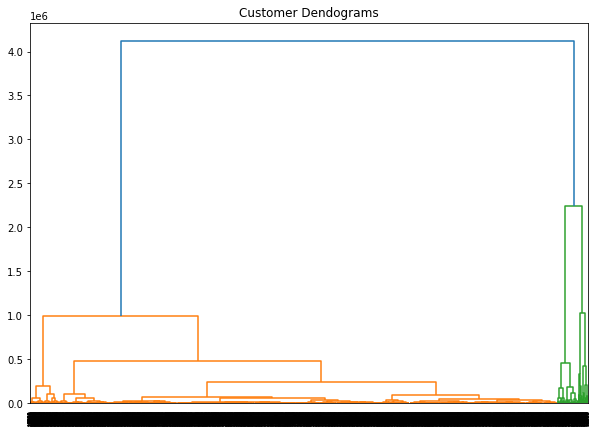

In [89]:
#plt.figure(figsize=(10, 7))
#plt.title("Customer Dendograms")
#dend = shc.dendrogram(shc.linkage(HAC_Clustering, method='ward'))
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
#cluster.fit_predict(X)

In [ ]:
# Scaling the data so that all the features become comparable


scaler = StandardScaler()
HAC_Clustering_scaled = scaler.fit_transform(HAC_Clustering)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
HAC_Clustering_normalized = normalize(HAC_Clustering_scaled)
  
# Converting the numpy array into a pandas DataFrame
HAC_Clustering_normalized = pd.DataFrame(HAC_Clustering_normalized)

In [95]:
#fraud vs. normal transactions 
counts = train['FRAUD_NONFRAUD'].value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 9836 non-fraudulent transactions (70.257%) and 4164 fraudulent transactions (29.743%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

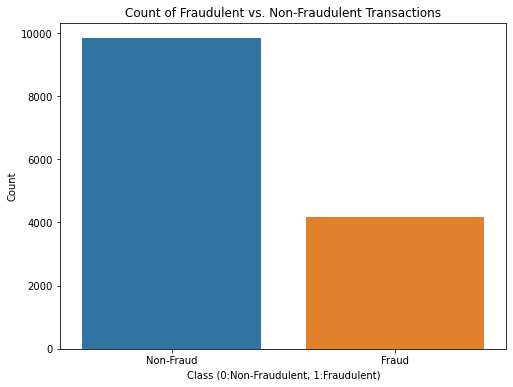

In [96]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [113]:
sns.heatmap(train.corr,yticklabels=False, cmap="afmhot")

ValueError: Must pass 2-d input. shape=()